In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_orig = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/2022_03_pipe_winter/220310_데이터셋_고령_0316정리4_sheet1.xlsx", sheet_name='case1to4')

df_orig.tail(15)

,temp,Grade,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도,보온재,고도,음/양지,가정용/일반용
8157,1.6,Normal,6.0,39.9,1.3,0.0,36.4,많음,18,양지,일반용
8158,1.8,Normal,10.4,251.2,0.8,0.0,22.5,많음,18,양지,일반용
8159,2.1,Normal,11.0,129.2,1.0,0.0,20.5,많음,18,양지,일반용
8160,2.7,Normal,12.4,62.4,1.2,0.0,18.6,많음,18,양지,일반용
8161,3,OK,13.7,33.8,1.8,0.0,18.2,많음,18,양지,일반용
8162,3.3,OK,15.0,166.9,0.8,0.0,16.8,많음,18,양지,일반용
8163,3.5,OK,15.0,7.8,2.0,0.0,17.3,많음,18,양지,일반용
8164,3.7,OK,14.5,123.7,1.7,0.0,17.6,많음,18,양지,일반용
8165,3.9,OK,11.9,164.1,1.1,0.0,23.7,많음,18,양지,일반용
8166,3.9,OK,8.1,200.1,0.5,0.0,32.0,많음,18,양지,일반용


In [ ]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8172 entries, 0 to 8171
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   temp     8172 non-null   object 
 1    Grade   8172 non-null   object 
 2   기온(°C)   7836 non-null   float64
 3   풍향(deg)  7800 non-null   float64
 4   풍속(m/s)  7800 non-null   float64
 5   강수량(mm)  7940 non-null   float64
 6   습도       8068 non-null   float64
 7   보온재      8172 non-null   object 
 8   고도       8172 non-null   int64  
 9   음/양지     8172 non-null   object 
 10  가정용/일반용  8172 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 702.4+ KB


In [ ]:
df = df_orig

In [ ]:
#condition = (df.temp == 1.6)
condition = (df.temp == '-')
df[condition]

,temp,Grade,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도,보온재,고도,음/양지,가정용/일반용
434,-,Nan,4.2,348.0,2.6,0.0,24.9,많음,29,양지,가정용
745,-,Nan,-5.5,196.2,0.6,0.0,50.3,많음,29,양지,가정용
746,-,Nan,-6.1,314.9,0.9,0.0,53.2,많음,29,양지,가정용
752,-,Nan,-11.5,0.0,0.1,0.0,73.1,많음,29,양지,가정용
762,-,Nan,3.2,89.3,1.9,0.0,21.6,많음,29,양지,가정용
...,...,...,...,...,...,...,...,...,...,...,...
7171,-,Nan,-5.0,0.0,0.2,0.0,97.9,많음,18,양지,일반용
7172,-,Nan,-2.6,0.0,0.2,0.0,97.9,많음,18,양지,일반용
7173,-,Nan,1.1,0.0,0.3,0.0,74.6,많음,18,양지,일반용
7174,-,Nan,4.7,227.0,1.4,0.0,49.2,많음,18,양지,일반용


In [ ]:
###df = df[~df['temp'].str.contains('-')]

######
#df["temp"] = df["temp"].str.replace(pat='-', repl=np.nan)
######

#df["temp"] = df["temp"].str.replace('-', '999')
#df["temp"] = df["temp"].str.replace(pat=r'[^\w]', repl=r'', regex=True)

In [ ]:

mask = df['temp'].isin(['-'])
df[~mask].tail() 
df = df[~mask]

df
# # 그리고 마스크 영역을 제외한 영역을 볼 수 있다.
# df[~mask].head() 
# # 저장하려면 객체에 다시 저장
# df1 = df[~mask]
# 출처: https://koreapy.tistory.com/63 [py]

,temp,Grade,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도,보온재,고도,음/양지,가정용/일반용
0,6.9,OK,10.4,262.1,0.6,0.0,66.2,많음,29,양지,가정용
1,7.3,OK,11.8,274.0,0.5,0.0,62.5,많음,29,양지,가정용
2,7.6,OK,13.6,296.3,0.9,0.0,58.0,많음,29,양지,가정용
3,8.1,OK,14.2,83.0,1.4,0.0,56.8,많음,29,양지,가정용
4,8.5,OK,13.9,121.3,1.1,0.0,59.5,많음,29,양지,가정용
...,...,...,...,...,...,...,...,...,...,...,...
8167,3.7,OK,5.3,0.0,0.3,0.0,39.8,많음,18,양지,일반용
8168,3.6,OK,3.7,0.0,0.3,0.0,45.8,많음,18,양지,일반용
8169,3.4,OK,2.2,0.0,0.0,0.0,50.3,많음,18,양지,일반용
8170,3.2,OK,1.0,0.0,0.1,0.0,56.1,많음,18,양지,일반용


In [ ]:
# temp행은 삭제 
df = df.iloc[:,1:]
df

,Grade,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도,보온재,고도,음/양지,가정용/일반용
0,OK,10.4,262.1,0.6,0.0,66.2,많음,29,양지,가정용
1,OK,11.8,274.0,0.5,0.0,62.5,많음,29,양지,가정용
2,OK,13.6,296.3,0.9,0.0,58.0,많음,29,양지,가정용
3,OK,14.2,83.0,1.4,0.0,56.8,많음,29,양지,가정용
4,OK,13.9,121.3,1.1,0.0,59.5,많음,29,양지,가정용
...,...,...,...,...,...,...,...,...,...,...
8167,OK,5.3,0.0,0.3,0.0,39.8,많음,18,양지,일반용
8168,OK,3.7,0.0,0.3,0.0,45.8,많음,18,양지,일반용
8169,OK,2.2,0.0,0.0,0.0,50.3,많음,18,양지,일반용
8170,OK,1.0,0.0,0.1,0.0,56.1,많음,18,양지,일반용


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7736 entries, 0 to 8171
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0    Grade   7736 non-null   object 
 1   기온(°C)   7400 non-null   float64
 2   풍향(deg)  7364 non-null   float64
 3   풍속(m/s)  7364 non-null   float64
 4   강수량(mm)  7504 non-null   float64
 5   습도       7632 non-null   float64
 6   보온재      7736 non-null   object 
 7   고도       7736 non-null   int64  
 8   음/양지     7736 non-null   object 
 9   가정용/일반용  7736 non-null   object 
dtypes: float64(5), int64(1), object(4)
memory usage: 664.8+ KB


In [ ]:
df = df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7132 entries, 0 to 8171
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0    Grade   7132 non-null   object 
 1   기온(°C)   7132 non-null   float64
 2   풍향(deg)  7132 non-null   float64
 3   풍속(m/s)  7132 non-null   float64
 4   강수량(mm)  7132 non-null   float64
 5   습도       7132 non-null   float64
 6   보온재      7132 non-null   object 
 7   고도       7132 non-null   int64  
 8   음/양지     7132 non-null   object 
 9   가정용/일반용  7132 non-null   object 
dtypes: float64(5), int64(1), object(4)
memory usage: 612.9+ KB


In [ ]:
#df['temp'] = pd.to_numeric(df['temp'])
#df["temp"] = df["temp"].astype('float')
df["temp"] = df["temp"].astype('int')


KeyError: ignored

In [ ]:
print(df[' Grade'].value_counts())

Normal     3052
OK         2074
Warning    1020
Caution     882
Serious     104
Name:  Grade, dtype: int64


In [ ]:
df.reset_index(drop=True)

,Grade,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도,보온재,고도,음/양지,가정용/일반용
0,OK,10.4,262.1,0.6,0.0,66.2,많음,29,양지,가정용
1,OK,11.8,274.0,0.5,0.0,62.5,많음,29,양지,가정용
2,OK,13.6,296.3,0.9,0.0,58.0,많음,29,양지,가정용
3,OK,14.2,83.0,1.4,0.0,56.8,많음,29,양지,가정용
4,OK,13.9,121.3,1.1,0.0,59.5,많음,29,양지,가정용
...,...,...,...,...,...,...,...,...,...,...
7127,OK,5.3,0.0,0.3,0.0,39.8,많음,18,양지,일반용
7128,OK,3.7,0.0,0.3,0.0,45.8,많음,18,양지,일반용
7129,OK,2.2,0.0,0.0,0.0,50.3,많음,18,양지,일반용
7130,OK,1.0,0.0,0.1,0.0,56.1,많음,18,양지,일반용


In [ ]:
#df.drop('date', axis=1, inplace=True)

# New Section

In [ ]:
# df_orig["음/양지"].unique()
# df_orig["보온재"].nunique()
df["음/양지"].unique()
df["보온재"].nunique()

1

In [ ]:
df.isna().sum()

 Grade     0
기온(°C)     0
풍향(deg)    0
풍속(m/s)    0
강수량(mm)    0
습도         0
보온재        0
고도         0
음/양지       0
가정용/일반용    0
dtype: int64

In [ ]:
#df_orig.loc[df["습도"].isna()]
df.loc[df["습도"].isna()]
df.loc[df["기온(°C)"].isna()]

,Grade,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도,보온재,고도,음/양지,가정용/일반용


In [ ]:
cols = ["기온(°C)", "풍속(m/s)", "강수량(mm)", "습도"]

for col in cols:
    df[col] = df[col].fillna(method='ffill')
  

cols = ["풍향(deg)"]

for col in cols:
    df[col] = df[col].fillna(df[col].mean()) #중앙값, mean(), fillna(method='ffill')/fillna(method='backfill')

# cols = ["기온(°C)", "풍속(m/s)", "강수량(mm)", "습도"]

# for col in cols:
#     df_orig[col] = df_orig[col].fillna(method='ffill')
  

# cols = ["풍향(deg)"]

# for col in cols:
#     df_orig[col] = df_orig[col].fillna(df_orig[col].mean()) #중앙값, mean(), fillna(method='ffill')/fillna(method='backfill')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
df.isna().sum()

 Grade     0
기온(°C)     0
풍향(deg)    0
풍속(m/s)    0
강수량(mm)    0
습도         0
보온재        0
고도         0
음/양지       0
가정용/일반용    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7132 entries, 0 to 8171
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0    Grade   7132 non-null   object 
 1   기온(°C)   7132 non-null   float64
 2   풍향(deg)  7132 non-null   float64
 3   풍속(m/s)  7132 non-null   float64
 4   강수량(mm)  7132 non-null   float64
 5   습도       7132 non-null   float64
 6   보온재      7132 non-null   object 
 7   고도       7132 non-null   int64  
 8   음/양지     7132 non-null   object 
 9   가정용/일반용  7132 non-null   object 
dtypes: float64(5), int64(1), object(4)
memory usage: 612.9+ KB


In [ ]:
# SKlearn의 라벨 인코더를 적용해본다. 

from sklearn.preprocessing import LabelEncoder as LE

lbls =[" Grade", "보온재", "음/양지", "가정용/일반용"]
for lbl in lbls:
    df[lbl] = LE().fit_transform(df[lbl])
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
#df_orig.tail(10)
df.head(50)

,Grade,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도,보온재,고도,음/양지,가정용/일반용
0,2,10.4,262.1,0.6,0.0,66.2,0,29,0,0
1,2,11.8,274.0,0.5,0.0,62.5,0,29,0,0
2,2,13.6,296.3,0.9,0.0,58.0,0,29,0,0
3,2,14.2,83.0,1.4,0.0,56.8,0,29,0,0
4,2,13.9,121.3,1.1,0.0,59.5,0,29,0,0
5,2,11.7,77.3,0.7,0.0,67.9,0,29,0,0
6,2,11.1,269.4,1.2,0.0,66.5,0,29,0,0
7,2,7.5,0.0,0.4,0.0,80.3,0,29,0,0
8,2,5.7,0.0,0.1,0.0,90.9,0,29,0,0
9,2,4.5,0.0,0.1,0.0,97.9,0,29,0,0


In [ ]:
# ctgs = ["보온재", "음/양지", "가정용/일반용"]
ctgs = ["음/양지", "가정용/일반용"]
for ctg in ctgs:
     df[ctg] = df[ctg].astype("category")
    
df = pd.get_dummies(df)


# ctgs = ["보온재", "음/양지", "가정용/일반용"]
# #ctgs = ["음/양지", "가정용/일반용"]

# for ctg in ctgs:
#     df_orig[ctg] = df_orig[ctg].astype("category")
    
# df = pd.get_dummies(df_orig)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df

,Grade,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도,보온재,고도,음/양지_0,음/양지_1,가정용/일반용_0,가정용/일반용_1
0,2,10.4,262.1,0.6,0.0,66.2,0,29,1,0,1,0
1,2,11.8,274.0,0.5,0.0,62.5,0,29,1,0,1,0
2,2,13.6,296.3,0.9,0.0,58.0,0,29,1,0,1,0
3,2,14.2,83.0,1.4,0.0,56.8,0,29,1,0,1,0
4,2,13.9,121.3,1.1,0.0,59.5,0,29,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8167,2,5.3,0.0,0.3,0.0,39.8,0,18,1,0,0,1
8168,2,3.7,0.0,0.3,0.0,45.8,0,18,1,0,0,1
8169,2,2.2,0.0,0.0,0.0,50.3,0,18,1,0,0,1
8170,2,1.0,0.0,0.1,0.0,56.1,0,18,1,0,0,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler

#scales=["함내온도", "기온(°C)", "풍속(m/s)", "강수량(mm)", "습도", "고도"]
scales=["기온(°C)", "풍향(deg)", "풍속(m/s)", "강수량(mm)", "습도", "고도"]

min = MinMaxScaler()
min.fit(df[scales])
df[scales] = min.transform(df[scales])

In [ ]:
#df = df.iloc[:500] # 데이터프레임 커트 테스트
df

,Grade,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도,보온재,고도,음/양지_0,음/양지_1,가정용/일반용_0,가정용/일반용_1
0,2,0.764901,0.728460,0.098361,0.0,0.645017,0,1.0,1,0,1,0
1,2,0.811258,0.761534,0.081967,0.0,0.603583,0,1.0,1,0,1,0
2,2,0.870861,0.823513,0.147541,0.0,0.553191,0,1.0,1,0,1,0
3,2,0.890728,0.230684,0.229508,0.0,0.539754,0,1.0,1,0,1,0
4,2,0.880795,0.337132,0.180328,0.0,0.569989,0,1.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8167,2,0.596026,0.000000,0.049180,0.0,0.349384,0,0.0,1,0,0,1
8168,2,0.543046,0.000000,0.049180,0.0,0.416573,0,0.0,1,0,0,1
8169,2,0.493377,0.000000,0.000000,0.0,0.466965,0,0.0,1,0,0,1
8170,2,0.453642,0.000000,0.016393,0.0,0.531915,0,0.0,1,0,0,1


In [ ]:
print(df[' Grade'].value_counts())

1    3052
2    2074
4    1020
0     882
3     104
Name:  Grade, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7132 entries, 0 to 8171
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0    Grade     7132 non-null   int64  
 1   기온(°C)     7132 non-null   float64
 2   풍향(deg)    7132 non-null   float64
 3   풍속(m/s)    7132 non-null   float64
 4   강수량(mm)    7132 non-null   float64
 5   습도         7132 non-null   float64
 6   보온재        7132 non-null   int64  
 7   고도         7132 non-null   float64
 8   음/양지_0     7132 non-null   uint8  
 9   음/양지_1     7132 non-null   uint8  
 10  가정용/일반용_0  7132 non-null   uint8  
 11  가정용/일반용_1  7132 non-null   uint8  
dtypes: float64(6), int64(2), uint8(4)
memory usage: 529.3 KB


In [ ]:
#df_orig = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/2022_03_pipe_winter/220310_데이터셋_고령_0316정리4_sheet1.xlsx", sheet_name='case1to4')

# 현재까지 정리된 전처리 화일을 저장해 둡니다. 
df.to_csv("/content/drive/MyDrive/Colab Notebooks/2022_03_pipe_winter/pipe_data.csv", encoding='cp949')


In [ ]:
df

,Grade,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도,보온재,고도,음/양지_0,음/양지_1,가정용/일반용_0,가정용/일반용_1
0,2,0.764901,0.728460,0.098361,0.0,0.645017,0,1.0,1,0,1,0
1,2,0.811258,0.761534,0.081967,0.0,0.603583,0,1.0,1,0,1,0
2,2,0.870861,0.823513,0.147541,0.0,0.553191,0,1.0,1,0,1,0
3,2,0.890728,0.230684,0.229508,0.0,0.539754,0,1.0,1,0,1,0
4,2,0.880795,0.337132,0.180328,0.0,0.569989,0,1.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8167,2,0.596026,0.000000,0.049180,0.0,0.349384,0,0.0,1,0,0,1
8168,2,0.543046,0.000000,0.049180,0.0,0.416573,0,0.0,1,0,0,1
8169,2,0.493377,0.000000,0.000000,0.0,0.466965,0,0.0,1,0,0,1
8170,2,0.453642,0.000000,0.016393,0.0,0.531915,0,0.0,1,0,0,1


In [ ]:
#from sklearn.model_selection import train_test_split

#x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,1:], df["temp"], test_size=0.2, stratify=df["temp"], random_state=42)
#x_train, x_test, y_train, y_test = train_test_split(df.iloc[0:7736,1:], df["temp"], test_size=0.2, stratify=df["temp"], random_state=42)

#X_train, X_test, y_train, y_test = train_test_split(df.iloc[  ,1:], df["species"], test_size=0.2, stratify=df["species"], random_state=1)

x = df[['기온(°C)', '풍속(m/s)', '습도', '고도', '음/양지_0', '음/양지_1', '가정용/일반용_0', '가정용/일반용_1']]
y = df[' Grade']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify=df[' Grade'], random_state=42)



In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5705, 8), (1427, 8), (5705,), (1427,))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=300)
#model = RandomForestClassifier(n_estimators=300, max_depth=4, min_samples_leaf=2, min_samples_split=2)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

y_pred



array([2, 1, 1, ..., 2, 1, 2])

In [ ]:
print(y_train.value_counts())

1    2441
2    1659
4     816
0     706
3      83
Name:  Grade, dtype: int64


In [ ]:
print(x_train['풍속(m/s)'].value_counts())

0.016393    591
0.032787    521
0.049180    442
0.065574    400
0.081967    364
0.000000    336
0.098361    284
0.114754    240
0.131148    178
0.147541    156
0.180328    154
0.163934    142
0.196721    123
0.229508    114
0.327869    113
0.213115    104
0.278689    102
0.393443     99
0.262295     94
0.245902     88
0.409836     85
0.311475     80
0.360656     76
0.295082     75
0.377049     75
0.475410     74
0.344262     63
0.491803     58
0.459016     54
0.442623     48
0.426230     42
0.540984     38
0.508197     37
0.524590     33
0.590164     27
0.557377     21
0.704918     20
0.655738     19
0.622951     17
0.688525     14
0.606557     13
0.721311     11
0.737705     11
0.573770     10
0.819672      9
0.754098      8
0.803279      7
1.000000      7
0.901639      6
0.672131      6
0.639344      5
0.786885      4
0.852459      3
0.885246      2
0.770492      2
Name: 풍속(m/s), dtype: int64


In [ ]:
result = pd.DataFrame({'pred' : y_pred, 'real' : y_test})

result


,pred,real
5086,2,2
157,1,2
1472,1,1
5793,1,1
6845,4,4
...,...,...
4165,1,2
4886,1,1
5938,2,2
7646,1,1


In [ ]:
from sklearn.metrics import mean_absolute_error

print('MAE score:', mean_absolute_error(y_test, y_pred))

# result['ratio(%)'] = abs((result['pred'] - result['real']) / result['real']) * 100
# result.head(100)

MAE score: 0.6362999299229152


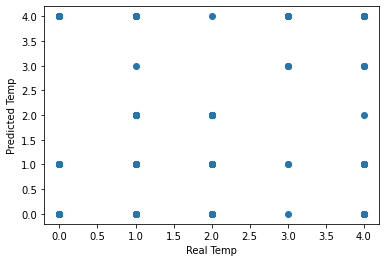

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Real Temp')
plt.ylabel('Predicted Temp')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49845 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54413 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49549 missing from current font.
  font.set_

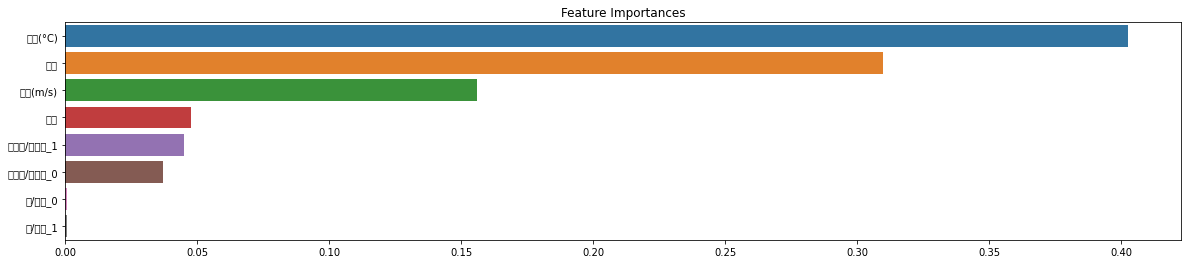

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_importances = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(20, 4))
plt.title('Feature Importances')
sns.barplot(x=ftr_importances, y=ftr_importances.index)

In [ ]:
# import seaborn as sns
# sns.lineplot(data=df, x="y_pred", y="y_test", color="blue")

print([y_pred-y_test])



[5086    0
157    -1
1472    0
5793    0
6845    0
       ..
4165   -1
4886    0
5938    0
7646    0
1673    0
Name:  Grade, Length: 1427, dtype: int64]


In [ ]:
from sklearn.metrics import accuracy_score

predicted = model.predict(x_test)
accuracy = accuracy_score(y_test, predicted)

print(f'Mean accuracy score: {accuracy:.3}')

Mean accuracy score: 0.655


In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
x=iris.data
y=iris.target


In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
import joblib

joblib.dump(model, "분류예측모델.pkl")

['분류예측모델.pkl']